# Car Selling Price Regression

### importing Libreries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_csv('car data.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

#### Finding Unique values for dummy var

In [5]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


#### Finding null values

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

###### removing car name as it is of no use

In [9]:
final_dataset=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


##### adding new feature for current year

In [11]:
final_dataset['Current_year']=2021

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


##### making a new feature which tells how old car is

In [13]:
final_dataset['num_years']=final_dataset['Current_year']-final_dataset['Year']

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,num_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [15]:
final_dataset.drop(['Year'], axis=1, inplace=True)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,num_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [17]:
final_dataset.drop(['Current_year'], axis=1, inplace=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### adding dummy variables

In [19]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [20]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [21]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
num_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


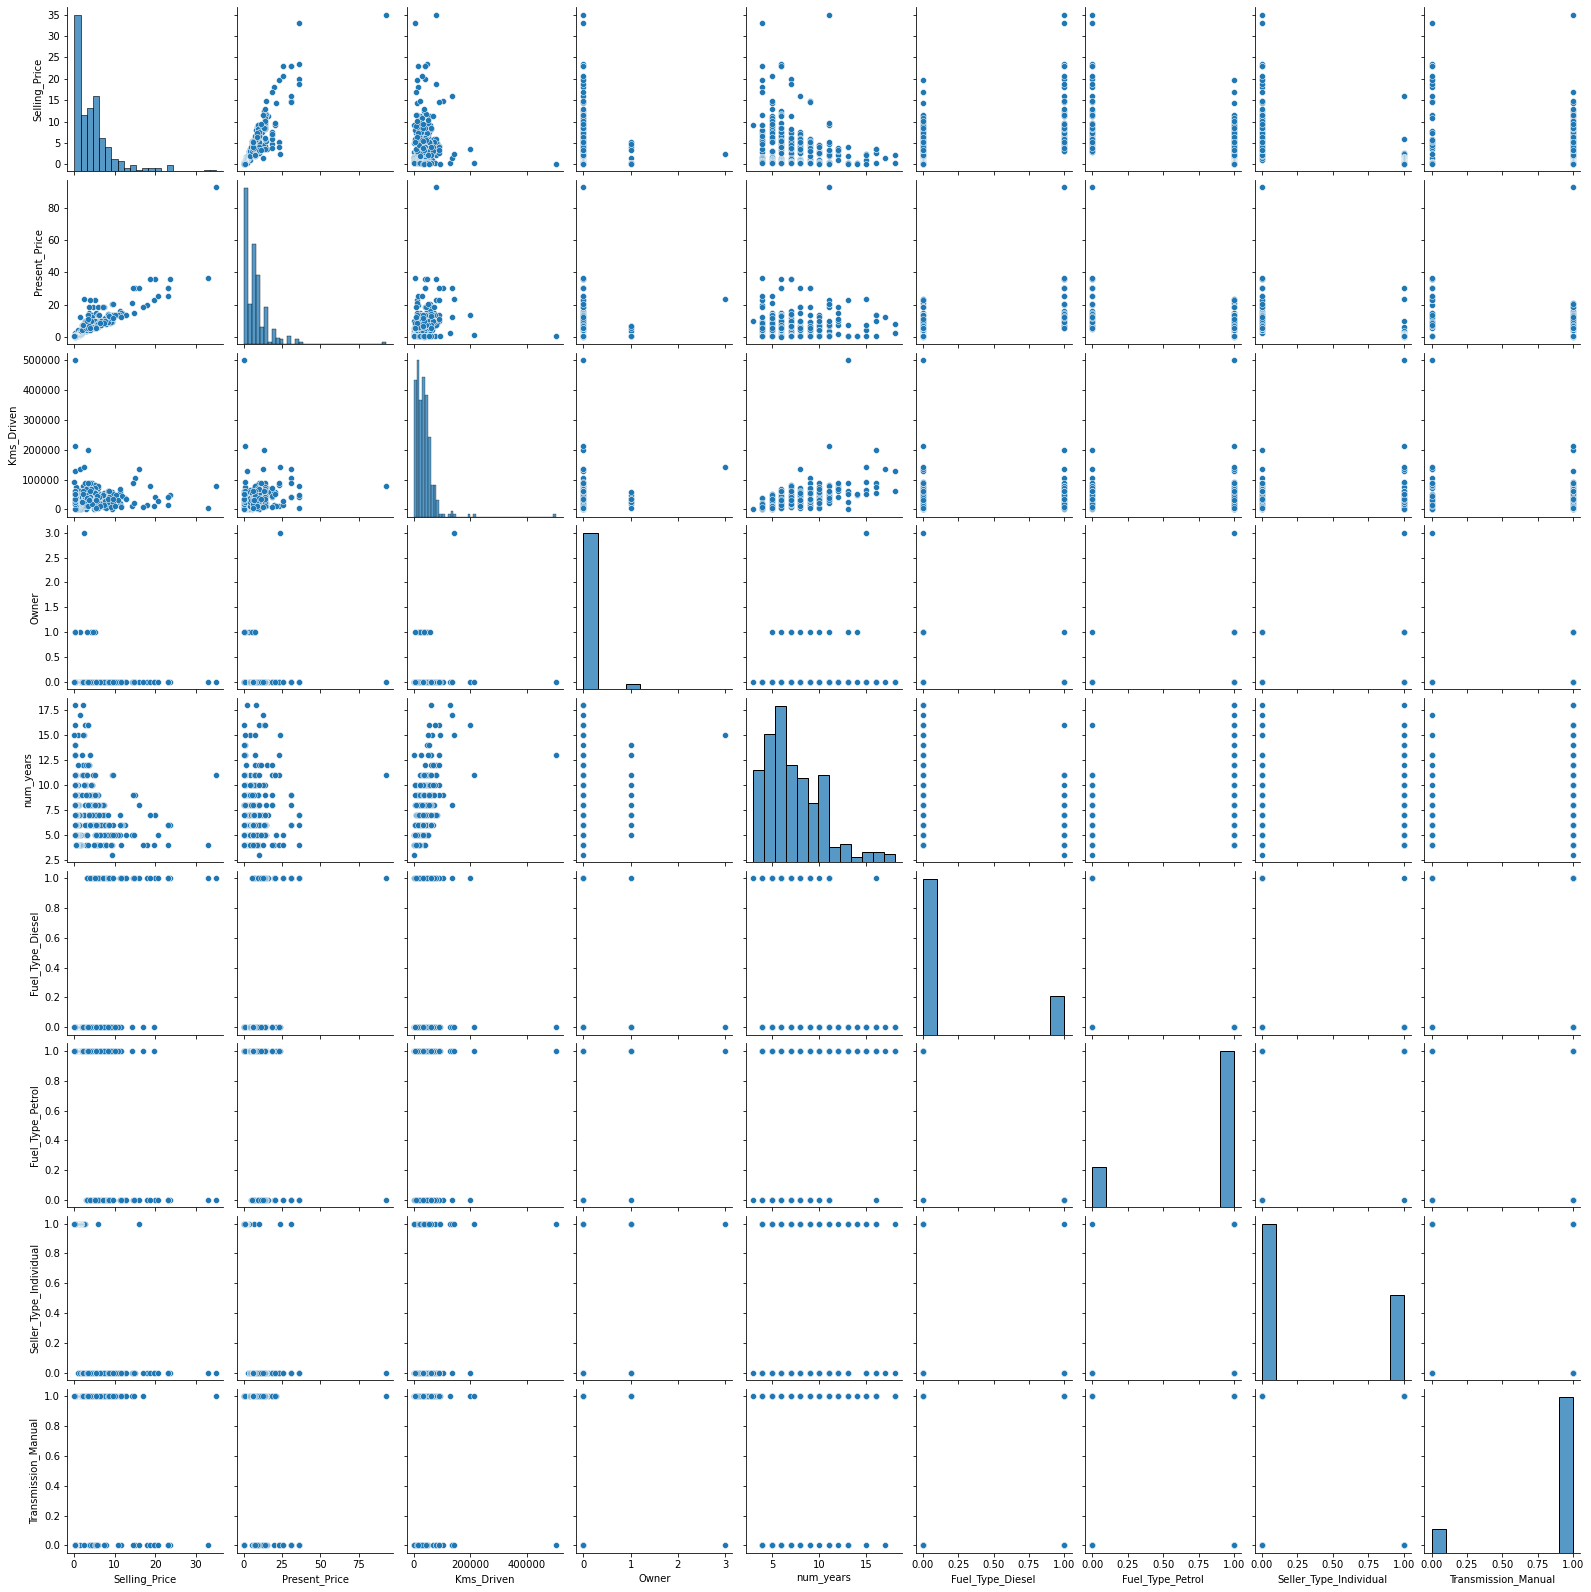

In [22]:
sns.pairplot(final_dataset)

In [23]:
%matplotlib inline

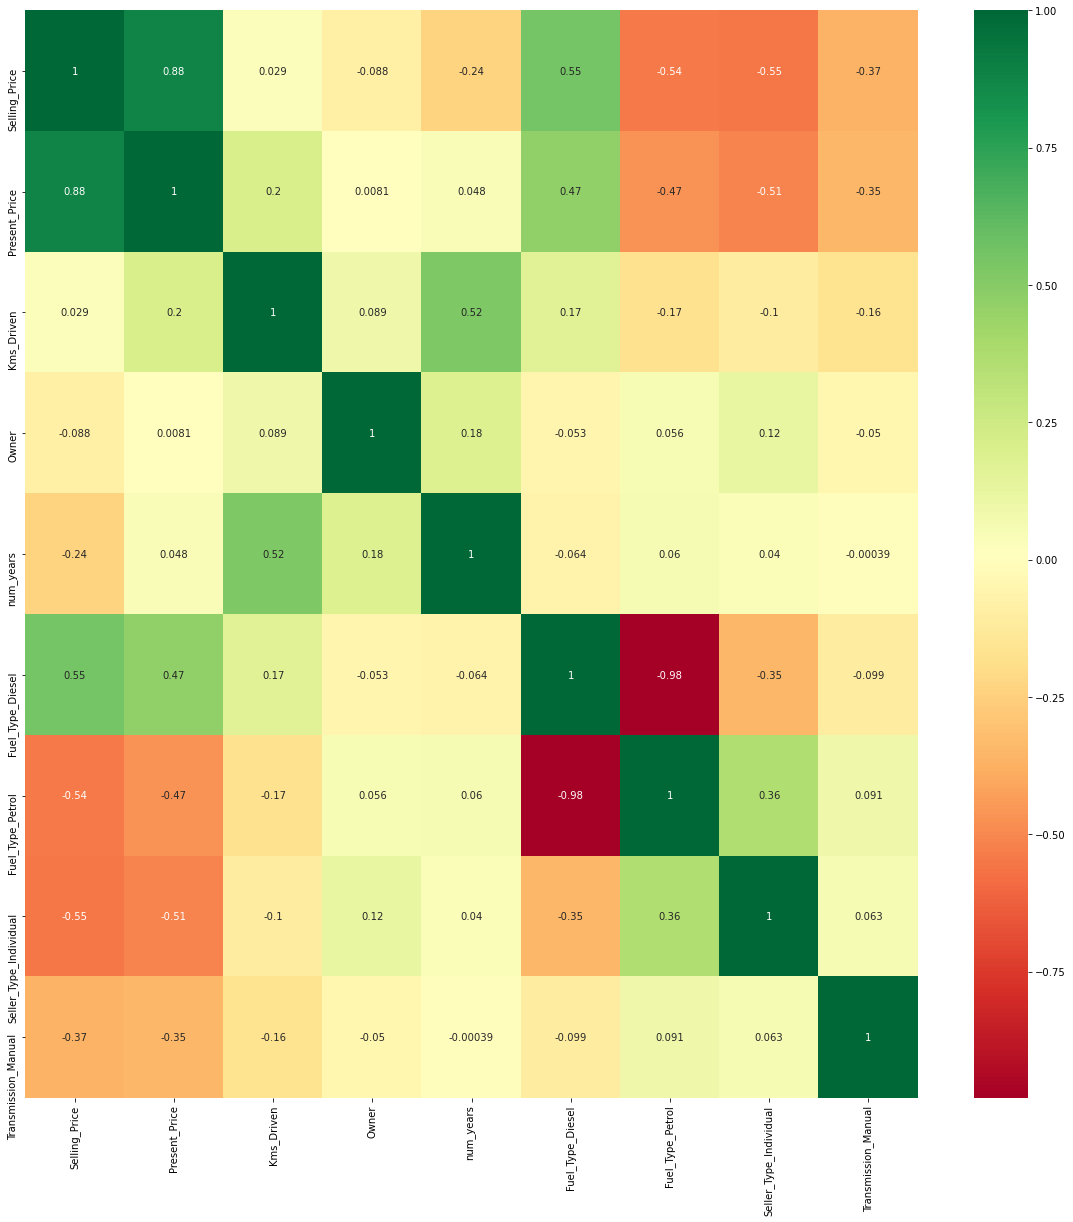

In [24]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [58]:
X.head()

,Present_Price,Kms_Driven,Owner,num_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


#### Extra Trees Regressor

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [28]:
print(model.feature_importances_)

[0.39323603 0.03955014 0.00086392 0.07550234 0.21692806 0.01128476
 0.12757735 0.13505741]


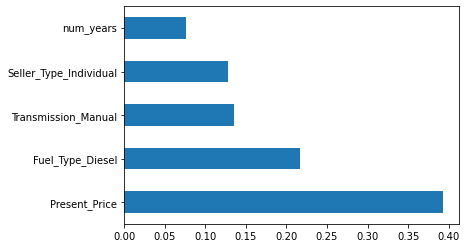

In [29]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()

### Splitting test case

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
X_train.shape

(240, 8)

#### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [33]:
# hyper para
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


#### Randomized Search CV

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [36]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [37]:
rf_random = RandomizedSearchCV(estimator= regressor, param_distributions = random_grid, scoring= 'neg_mean_squared_error', n_iter= 10, cv =5, verbose= 2,random_state= 42, n_jobs=1)

### Training the Model for diffrent parameters

In [38]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   47.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
y_pred= rf_random.predict(X_test)

In [40]:
y_pred

array([ 5.02055,  0.86299,  5.99084,  0.48012,  3.84585,  8.07283,
        8.20112,  6.60295,  0.50437,  0.51754,  2.28501,  4.71975,
        0.69296,  7.0937 ,  8.55444,  5.4942 ,  1.14379,  3.3917 ,
        8.72566,  2.5759 ,  0.41104,  7.59399, 10.40715,  0.67755,
        2.62377,  5.63266,  2.89824,  8.66251,  0.55434,  2.9926 ,
       15.92447,  1.22332,  8.94805,  1.41244, 10.84637,  6.28505,
        0.64339,  0.64408,  1.11412,  5.45585,  4.59689,  0.63452,
        0.24155,  7.96921,  5.01651,  0.78908,  1.35773,  4.02406,
        6.43813,  8.71251, 17.32034,  5.47704,  4.74966,  0.34116,
        0.63466,  4.55472,  8.75673,  0.6818 ,  7.23695,  9.41878,
        4.55235])

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

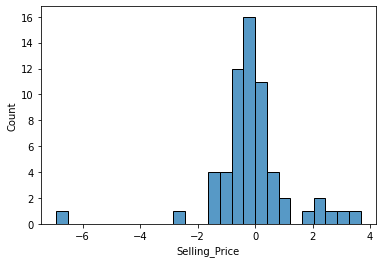

In [41]:
sns.histplot(y_test-y_pred)

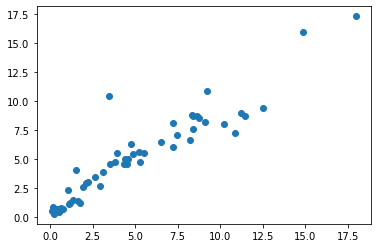

In [42]:
plt.scatter(y_test,y_pred)

In [43]:
# import pickle
# file = open('random_forest_regressor_model.pkl','wb')

# pickle.dump(rf_random,file)

In [49]:
z=list(y_test)

##### Comparing all the values Predict vs Actuall

In [53]:
print("Pred|Actuall")
for i in range(0,61):
    print("{:.2f}  {}".format(y_pred[i],z[i]))


Pred|Actuall
5.02  4.4
0.86  0.17
5.99  7.2
0.48  0.5
3.85  3.1
8.07  7.25
8.20  9.1
6.60  8.25
0.50  0.25
0.52  0.1
2.29  1.05
4.72  5.3
0.69  0.75
7.09  7.45
8.55  8.75
5.49  3.95
1.14  1.15
3.39  2.65
8.73  8.65
2.58  1.95
0.41  0.52
7.59  8.4
10.41  3.49
0.68  0.6
2.62  2.95
5.63  5.2
2.90  2.1
8.66  11.45
0.55  0.45
2.99  2.25
15.92  14.9
1.22  1.75
8.95  11.25
1.41  1.35
10.85  9.25
6.29  4.75
0.64  0.6
0.64  0.48
1.11  1.11
5.46  4.9
4.60  3.5
0.63  0.48
0.24  0.25
7.97  10.25
5.02  4.6
0.79  0.65
1.36  1.65
4.02  1.5
6.44  6.5
8.71  8.4
17.32  18.0
5.48  5.5
4.75  3.8
0.34  0.25
0.63  0.45
4.55  4.35
8.76  8.35
0.68  0.6
7.24  10.9
9.42  12.5
4.55  4.5


#### Predicting Single Values

In [56]:
rf_random.predict([[5.59,27000,0,7,0,1,0,1]])

array([3.7765])